<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [88]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [2]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [8]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [9]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [10]:
age_categories = [age_category(age) for age in data.Age]

In [11]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [12]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [16]:
data.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

Survived        108
Pclass          108
Name            108
Sex             108
Age              99
SibSp           108
Parch           108
Ticket          108
Fare            108
Cabin             6
Embarked        108
Age_category    108
dtype: int64

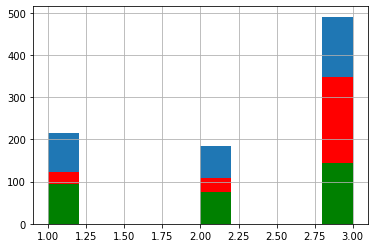

In [44]:
data.Pclass.hist()
df = data[(data['Sex'] == 'male')]
df.Pclass.hist(color = 'red')
df = data[(data['Sex'] == 'female')]
df.Pclass.hist(color = 'green')



data[(data.Sex =='male') & (data.Pclass == 2)].count()

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [58]:
print("Медіана :", data['Fare'].median())
# print("\n")
print("Стандартне відхилення :",data['Fare'].std())

Медіана : 14.4542
Стандартне відхилення : 49.693428597180905


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [63]:
print("Виживші серед менше 30 років: ", data[(data.Age < 30)].Survived.mean())
print("Виживші серед більше 60 років: ", data[(data.Age > 60)].Survived.mean())

Виживші серед менше 30 років:  0.40625
Виживші серед більше 60 років:  0.22727272727272727


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [65]:
print("Виживші серед жінок: ", data[(data.Sex == 'female')].Survived.mean())
print("Виживші серед чоловіків: ", data[(data.Sex == 'male')].Survived.mean())

Виживші серед жінок:  0.7420382165605095
Виживші серед чоловіків:  0.18890814558058924


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [86]:
c = 0
t = 0
w = 0
j = 0

for i in data[data.Sex == 'male'].Name:
    name_of_men = "Charles"
    if (i.find(name_of_men) >= 0):
        c = c+1

for i in data[data.Sex == 'male'].Name:
    name_of_men = "Thomas"
    if (i.find(name_of_men) >= 0):
        t = t+1
        
for i in data[data.Sex == 'male'].Name:
    name_of_men = "William"
    if (i.find(name_of_men) >= 0):
        w = w+1

for i in data[data.Sex == 'male'].Name:
    name_of_men = "John"
    if (i.find(name_of_men) >= 0):
        j = j+1
        
        
        
        
print("Charles: \t", c)
print("Thomas: \t", t)
print("William: \t", w)
print("John: \t\t", j)

Charles: 	 20
Thomas: 	 16
William: 	 54
John: 		 41


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

Середній вік серед виживших 28.343689655172415
Середній вік серед померлих 30.62617924528302


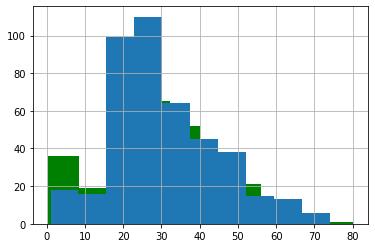

In [101]:
data[data.Survived == 1].Age.hist(color = 'green')
data[data.Survived == 0].Age.hist()

print('Середній вік серед виживших', data[data.Survived == 1].Age.mean())
print('Середній вік серед померлих', data[data.Survived == 0].Age.mean())



# МОЖНА ЩЕ І ТАК, АЛЕ ПО СУТІ ЦЕ ЛИШНЄ
# pd.plotting.scatter_matrix(df[['Age', 'Fare']], 
#                    figsize=(15, 15), diagonal='kde')
# plt.show()
# df2 = data[data.Survived == 0]
# pd.plotting.scatter_matrix(df2[['Age', 'Fare']], 
#                   figsize=(15, 15), diagonal='kde')
# plt.show()

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [112]:
for sex in ['male', 'female']:
    for clas in [1, 2, 3]:
        print("Стать: ", sex, "\tКлас: ", clas, "\tсередній вік: ",\
              data[(data.Pclass == clas) & (data.Sex == sex)].Age.mean())

Стать:  male 	Клас:  1 	середній вік:  41.28138613861386
Стать:  male 	Клас:  2 	середній вік:  30.74070707070707
Стать:  male 	Клас:  3 	середній вік:  26.507588932806325
Стать:  female 	Клас:  1 	середній вік:  34.61176470588235
Стать:  female 	Клас:  2 	середній вік:  28.722972972972972
Стать:  female 	Клас:  3 	середній вік:  21.75
